In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listened_data.csv')
drop_cols = [df.columns[0], 'Artist Name', 'Track Name', 'ms Played', 'Listen Count', 'Key']
df.drop(drop_cols, axis=1, inplace=True)  # remove index column
df.head()

,Tempo,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Liked
0,133.946,0.541,0.910,-6.651,0.0963,0.0631,0.1120,0.279,True
1,93.933,0.529,0.830,-5.428,0.0397,0.0211,0.0983,0.318,True
2,104.991,0.521,0.506,-8.599,0.0299,0.1840,0.1090,0.215,False
3,116.840,0.668,0.718,-5.530,0.1420,0.0106,0.0588,0.830,False
4,143.982,0.817,0.578,-7.579,0.0824,0.2240,0.2510,0.851,True


In [3]:
df["Loudness"] = 10**(df["Loudness"] / 20)
df.head()

,Tempo,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Liked
0,133.946,0.541,0.910,0.464997,0.0963,0.0631,0.1120,0.279,True
1,93.933,0.529,0.830,0.535303,0.0397,0.0211,0.0983,0.318,True
2,104.991,0.521,0.506,0.371578,0.0299,0.1840,0.1090,0.215,False
3,116.840,0.668,0.718,0.529054,0.1420,0.0106,0.0588,0.830,False
4,143.982,0.817,0.578,0.417878,0.0824,0.2240,0.2510,0.851,True


In [4]:
col_standardize = ["Tempo", "Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Valence"]
scaler = MinMaxScaler()
df[col_standardize] = scaler.fit_transform(df[col_standardize])
df.head()

,Tempo,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Liked
0,0.547583,0.549239,0.910,0.406158,0.100000,0.063353,0.112112,0.283537,True
1,0.384007,0.537056,0.830,0.467701,0.041225,0.021185,0.098398,0.323171,True
2,0.429213,0.528934,0.506,0.324384,0.031049,0.184739,0.109109,0.218496,False
3,0.477652,0.678173,0.718,0.462230,0.147456,0.010643,0.058859,0.843496,False
4,0.588611,0.829442,0.578,0.364913,0.085566,0.224900,0.251251,0.864837,True


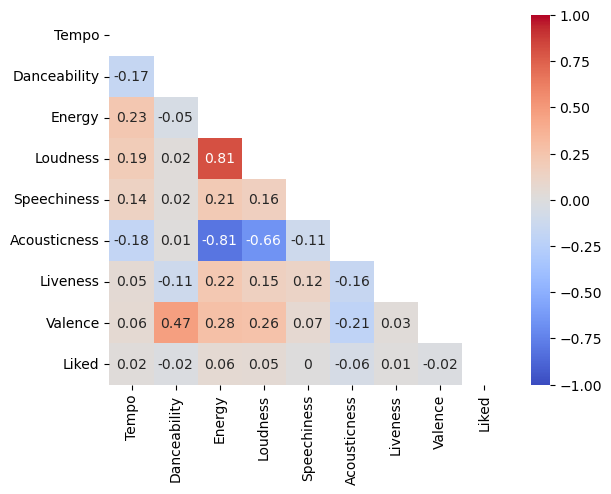

In [5]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [6]:
matrix = df.corr().unstack()
matrix = matrix[abs(matrix) >= 0.5]      # Strong correlation
print(matrix)

Tempo         Tempo           1.000000
Danceability  Danceability    1.000000
Energy        Energy          1.000000
              Loudness        0.814632
              Acousticness   -0.813309
Loudness      Energy          0.814632
              Loudness        1.000000
              Acousticness   -0.664818
Speechiness   Speechiness     1.000000
Acousticness  Energy         -0.813309
              Loudness       -0.664818
              Acousticness    1.000000
Liveness      Liveness        1.000000
Valence       Valence         1.000000
Liked         Liked           1.000000
dtype: float64
